# 爬取電影影評
[影評網址](https://news.agentm.tw/category/%E9%9B%BB%E5%BD%B1%E5%BD%B1%E8%A9%95/)

## 爬取影評首頁

In [57]:
import requests
from bs4 import BeautifulSoup
import re

# Extract movie names
def extract_movie_name(title):
    # Define the regular expression pattern to capture text within 《》
    pattern = r'《(.*?)》'
    # Find all occurrences of the pattern
    movie_names = re.findall(pattern, title)
    # Return the first occurrence or None if not found
    return movie_names[0] if movie_names else None

# Define the URL
url = 'https://news.agentm.tw/category/%E9%9B%BB%E5%BD%B1%E5%BD%B1%E8%A9%95/'
content_url_list = [] # list of article content url
movie_name_list = []  # list of movie names

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.ok:
    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all <h3> tags with class 'ec-title'
    h3_tags = soup.find_all('h3', class_='ec-title')
    
    # Iterate over each <h3> tag
    for h3 in h3_tags:
        # Find <a> tag within <h3> tag
        a_tag = h3.find('a')
        
        # Extract the href (link) and title (text) from the <a> tag
        if a_tag:
            link = a_tag.get('href', '')
            content_url_list.append(link)
            title = a_tag.get('title', '')
            movie_name = extract_movie_name(title)
            movie_name_list.append(movie_name)
            print(f'Title: {title}\nLink: {link}\nMovie Name: {movie_name}\n')

else:
    print("Failed to retrieve the webpage")


Title: 【影評】Netflix《眼淚工匠》：乍看還以為是義大利版《暮光之城》，原來只是孤兒版《禁忌世代》
Link: https://news.agentm.tw/277463/
Movie Name: 眼淚工匠

Title: 【影評】《禁忌之慾》：凸顯了肉體情慾，卻疏略心理描繪的可惜之作
Link: https://news.agentm.tw/277440/
Movie Name: 禁忌之慾

Title: 【影評】相米慎二《搬家》: 父母要離婚了，被迫成為被害者的女孩，決定踏上成為少女的冒險
Link: https://news.agentm.tw/277236/
Movie Name: 搬家

Title: 【影評】《功夫熊貓4》：屬於阿波生涯尾聲的傳承篇章，睽違 8 年的優秀續集
Link: https://news.agentm.tw/277248/
Movie Name: 功夫熊貓4

Title: 【影評】《SISU：黃金硬漢》：他只是拒絕死亡——人狠話不多的北歐殺神
Link: https://news.agentm.tw/277226/
Movie Name: SISU：黃金硬漢

Title: 【影評】《天魔：惡之初》：看似懷舊，卻處處充滿新意的優秀前傳
Link: https://news.agentm.tw/277212/
Movie Name: 天魔：惡之初

Title: 【影評】《超危險警探》：有懸疑感但劇本缺乏修飾，一點也不危險的懸疑小品
Link: https://news.agentm.tw/277005/
Movie Name: 超危險警探

Title: 【影評】《源生罪》：一字排開都是入圍獎項，電影卻毫無記憶點
Link: https://news.agentm.tw/277003/
Movie Name: 源生罪

Title: 【影評】《怪物樵夫》：病態殺人魔大戰神秘怪物的設定如此瘋狂，卻不像是瘋狂導演三池崇史的電影
Link: https://news.agentm.tw/276956/
Movie Name: 怪物樵夫

Title: 【影評】《聖鬥士星矢》：喚醒你的神祕第七感！燃燒吧，你的爛片小宇宙！
Link: https://news.agentm.tw/276928/
Movie Name: 聖鬥士

## 爬取影評內容

In [59]:
import requests
from bs4 import BeautifulSoup
import re

# Assuming `urls` is a list of URLs to crawl into, which you obtained from the previous scrape
urls = content_url_list  # Replace with actual URLs


# Extract movie names
def extract_movie_name(title):
    # Define the regular expression pattern to capture text within 《》
    pattern = r'《(.*?)》'
    # Find all occurrences of the pattern
    movie_names = re.findall(pattern, title)
    # Return the first occurrence or None if not found
    return movie_names[0] if movie_names else None

# Srape the article data
def scrape_article_data(article_url):
    response = requests.get(article_url)
    if response.ok:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the article content within div class="post"
        post_div = soup.find('div', class_='post')
        content = ''

        if post_div:
            for elem in post_div.find_all(['p', 'h2']):  # Get all p and h2 tags within div
                content += elem.get_text().strip() + ' '

        # Extract the author's name
        author_tag = soup.find('a', class_='ec-author')
        author_name = author_tag.get_text().strip() if author_tag else "Author not found"

        # Extract the publish date
        publish_date_tag = soup.find('time')
        publish_date = publish_date_tag.get_text().strip() if publish_date_tag else "Date not found"


        return {
            'url': article_url,
            'content': content,
            'author_name': author_name,
            'publish_date': publish_date
        }
    else:
        print(f"Failed to retrieve the article from {article_url}")
        return None



# Iterate over URLs and scrape content from each

for url in urls:
    article_data = scrape_article_data(url)
    print(article_data)


{'url': 'https://news.agentm.tw/277463/', 'content': 'Netflix《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演亞歷山卓傑諾韋西執導，演員陣容網羅眾多新生代演員，並由影歌雙棲的西蒙內包達瑟羅尼以及首挑大梁的卡特琳娜費里歐利主演。 《眼淚工匠》劇情講述在墳場孤兒院長大的少女妮卡，從小便深信著傳說中的「眼淚工匠」能幫助行屍走肉的人們找回正常的情感及情緒，直到被一對好心夫婦領養並完成她最大的夢想後，便將這個傳說拋諸腦後。妮卡原以為自己的人生要步入正軌時，卻沒想到她不願再見到的神祕男孩瑞吉爾也被同一個家庭收養，更糟的是，明明為冤家的兩人卻莫名被彼此深深吸引著。  內容目錄 《眼淚工匠》根本就是《暮光之城》同人文 青少年愛情電影幾乎都有個共通點——主角的身世通常要非常坎坷，不是家破人亡、父母離異，就是自己罹患了不治之症，或是因內外在壓力導致心理創傷，而《眼淚工匠》也毫不拖沓地直接破題，揭曉女主角妮卡因一場車禍失去父母，被送進孤兒院，在人生最悲慘之時遇見了男主角瑞吉爾。接下來《眼淚工匠》的劇情不出所料全都在公式化套路下發展，不過，若是硬要列舉出最出乎意料的部分，絕非尷尬又毫無邏輯的轉折情節莫屬。  之所以會覺得《眼淚工匠》是《暮光之城》的同人文，最主要是因為角色性格與《暮光之城》有幾分相像。譬如男主角瑞吉爾就像是《暮光之城》愛德華和雅各的綜合體，對女主角妮卡忽冷忽熱的態度以及周遭散發的神祕迷人氣息，與愛德華的人物設定有幾分相像。 至於像雅各的部分，除了瑞吉爾常常將自己比喻為狼之外，動不動就在鏡頭前裸上身展露好身材的習慣近乎一樣。有趣的是，男配角衝動、火爆的個性其實也有點像雅各，加上讓人忍不住邊看邊吐槽的劇情，真的很難不聯想到《暮光之城》。  當孤兒題材遇上《禁忌世代》  《眼淚工匠》完全符合校園愛慾電影的標準配置，不但擁有高顏值選角，主角的化學反應也相當足夠，更是有一定尺度的煽情戲。除了必備的三角戀元素外，游走在禁忌邊緣的情感戲也是相當熱門的題材。 雖雖然養兄妹相戀的禁忌元素曾在《我的過錯》見識過，而男女主角不健全的成長環境與複雜的情感糾與《禁忌世代》相似，就算曉得這段戀情註定會給對方帶來傷害，仍舊無法抗拒地被彼此深深吸引。  不過相較之下，《眼淚工匠》算是同類型作品中較簡潔有力且不會拖泥帶

# 整理成dataframe

In [61]:
import pandas as pd

# Assuming `article_data_list` is a list of dictionaries containing the scraped data for each article
article_data_list = [
    scrape_article_data(url) for url in urls  # Replace `urls` with your list of article URLs
]

# Create a DataFrame from the list of article data
df = pd.DataFrame(article_data_list)
df.insert(1, 'movie_name', movie_name_list)
# df['movie_name'] = movie_name_list

display(df)

,url,movie_name,content,author_name,publish_date
0,https://news.agentm.tw/277463/,眼淚工匠,Netflix《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演...,艾米希莉 Amesily,2024-04-12
1,https://news.agentm.tw/277440/,禁忌之慾,由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,人文電影的追尋,2024-04-12
2,https://news.agentm.tw/277236/,搬家,導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,龍貓大王通信,2024-04-10
3,https://news.agentm.tw/277248/,功夫熊貓4,2008 年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習...,影Joy Movie,2024-04-10
4,https://news.agentm.tw/277226/,SISU：黃金硬漢,如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在 Netflix...,Thelma 電影狂花,2024-04-10
5,https://news.agentm.tw/277212/,天魔：惡之初,構思經典電影的前傳故事，往往是吃力不討好的任務。除了要保留原作的氣氛及風格，還必須要在完整飽...,人狼屋,2024-04-10
6,https://news.agentm.tw/277005/,超危險警探,羅素克洛主演的懸疑片《超危險警探》於近日上映，他在這部電影中飾演一個失去記憶的退休警探，為了...,影Joy Movie,2024-04-09
7,https://news.agentm.tw/277003/,源生罪,命案、催眠、隱瞞、幻覺……《源生罪》以催眠貫穿全劇，影響記憶，隱藏真相，雖然追求的目的不同，...,電影虎蘭花,2024-04-08
8,https://news.agentm.tw/276956/,怪物樵夫,三池崇史，應該是日本最喜愛精神病態主題的導演。《殺手阿一》、《以藏》、《極道恐怖大劇場 牛頭...,龍貓大王通信,2024-04-08
9,https://news.agentm.tw/276928/,聖鬥士星矢,撇開我們先前聽到的種種評論，假設你的親友完全不知道 4 月 1 日在 Netflix 獨家上...,出前一廷,2024-04-05


##　輸出成 csv 和 json 檔

In [63]:
# Export the DataFrame to a CSV file
csv_filename = 'data/articles.csv'
df.to_csv(csv_filename, index=False, encoding='utf-8-sig')

# Export the DataFrame to a JSON file
json_filename = 'data/articles.json'
df.to_json(json_filename, orient='records', force_ascii=False)

print(f"Data exported to {csv_filename} and {json_filename}")


Data exported to data/articles.csv and data/articles.json


In [64]:
# ! pip install jieba

## jieba 斷詞

In [65]:
import jieba
import jieba.analyse

def extract_keywords(text):
    return jieba.analyse.extract_tags(text, topK=10) #提取前十個關鍵字

#創建一個新欄位keywords存放intro資料使用extract_keywords這個functionc後的結果
df['keywords'] = df['content'].apply(extract_keywords)
df.head(10)

,url,movie_name,content,author_name,publish_date,keywords
0,https://news.agentm.tw/277463/,眼淚工匠,Netflix《眼淚工匠》改編自義大利作家艾琳杜奧姆的同名暢銷小說，由《結婚哪有那麼男》導演...,艾米希莉 Amesily,2024-04-12,"[眼淚, 工匠, 瑞吉爾, 暮光, 之城, 劇情, 愛情, 創傷, 擁有, 孤兒院]"
1,https://news.agentm.tw/277440/,禁忌之慾,由波蘭導演湯瑪茲曼德斯執導的《禁忌之慾》，劇情描述受人景仰、奉公守法的女法官歐嘉，遇見比她小...,人文電影的追尋,2024-04-12,"[克斯, 兩人, 愛的, 電影, 歐嘉, 瑪雅, 職業, 我們, 他們, 設定]"
2,https://news.agentm.tw/277236/,搬家,導演相米慎二應該仍然保有日本影史的一個小紀錄：他有多達四部作品的主演，獲得了當年的最佳新人獎...,龍貓大王通信,2024-04-10,"[蓮子, 搬家, 電影, 這個, 相米, 離婚, 智子, 導演, 因為, 一個]"
3,https://news.agentm.tw/277248/,功夫熊貓4,2008 年，由夢工廠製作與發行的動畫片《功夫熊貓》，以古中國作為背景，描述一隻平凡熊貓學習...,影Joy Movie,2024-04-10,"[阿波, 熊貓, 功夫, 反派, 並且, 三部曲, 生涯, 第二集, 神龍大俠, 還是]"
4,https://news.agentm.tw/277226/,SISU：黃金硬漢,如今要當個殺神，光只是對付黑幫還不夠，你還得要隻身幹翻一小支納粹軍團。近期在 Netflix...,Thelma 電影狂花,2024-04-10,"[SISU, 金硬漢, 電影, 本片, 科夏伊, 一個, 主角, 殺神, 這類, 設計]"
5,https://news.agentm.tw/277212/,天魔：惡之初,構思經典電影的前傳故事，往往是吃力不討好的任務。除了要保留原作的氣氛及風格，還必須要在完整飽...,人狼屋,2024-04-10,"[天魔, 惡之初, 本片, 這個, 撒旦, 故事, 電影, 我們, 人類, 教會]"
6,https://news.agentm.tw/277005/,超危險警探,羅素克洛主演的懸疑片《超危險警探》於近日上映，他在這部電影中飾演一個失去記憶的退休警探，為了...,影Joy Movie,2024-04-09,"[警探, 超危險, 懸疑片, 電影, 記憶, 劇情, 駕駛, 素克洛, 一個, 角色]"
7,https://news.agentm.tw/277003/,源生罪,命案、催眠、隱瞞、幻覺……《源生罪》以催眠貫穿全劇，影響記憶，隱藏真相，雖然追求的目的不同，...,電影虎蘭花,2024-04-08,"[源生罪, 雪兒, 催眠, 記憶, 劇情, 樊承天, 什麼, 母親, 幻覺, 樊博權]"
8,https://news.agentm.tw/276956/,怪物樵夫,三池崇史，應該是日本最喜愛精神病態主題的導演。《殺手阿一》、《以藏》、《極道恐怖大劇場 牛頭...,龍貓大王通信,2024-04-08,"[三池, 怪物, 電影, 樵夫, 崇史, 瘋狂, 這些, 二宮, 必須, 變成]"
9,https://news.agentm.tw/276928/,聖鬥士星矢,撇開我們先前聽到的種種評論，假設你的親友完全不知道 4 月 1 日在 Netflix 獨家上...,出前一廷,2024-04-05,"[聖鬥士星, 電影, 原著, 這部, 漫畫, 聖衣, 主角, 一個, 因為, 像是]"


## 畫圖

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [69]:
G = nx.Graph()

for index, row in df.head(25).iterrows():
    movie_name = row['movie_name']
    keywords = row['keywords']

    G.add_node(movie_name, type='author')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(movie_name, keyword)

In [70]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

C:\Users\micha\anaconda3\envs\webcrawling\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


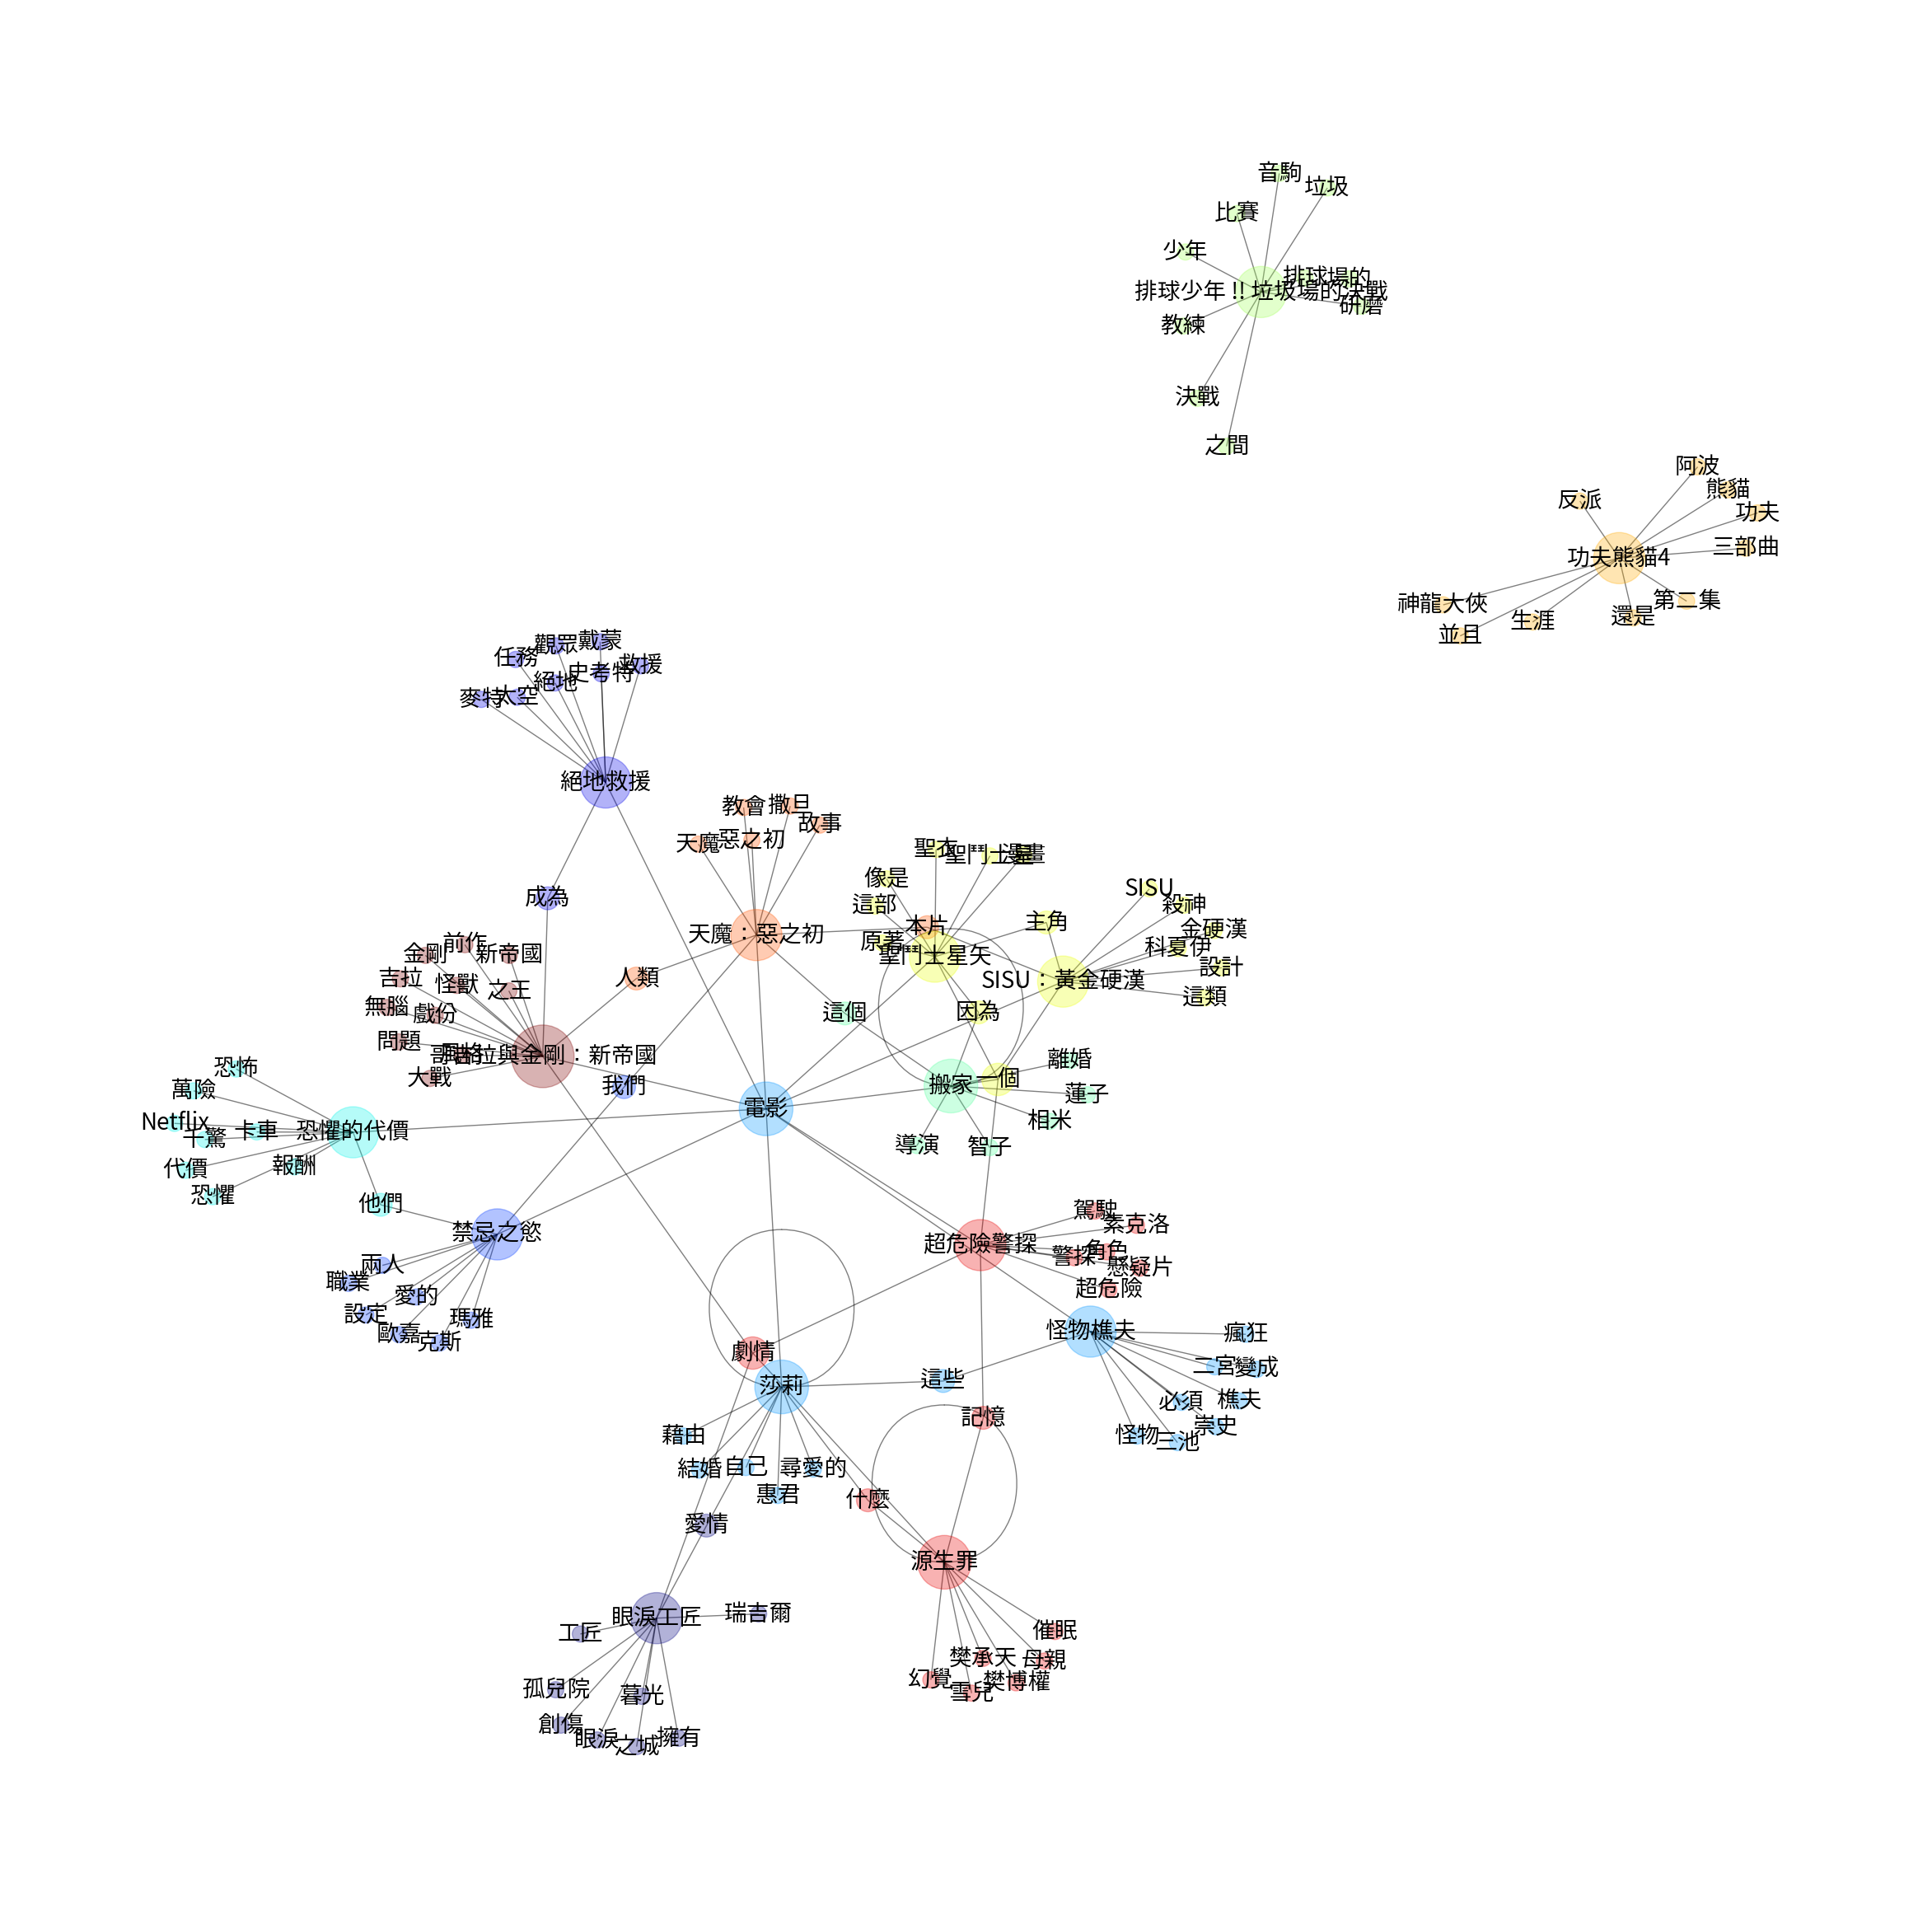

In [71]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()